# Counting Sort

Counting sort is a sorting technique based on keys between a specific range. It works by counting the number of objects having distinct key values (kind of hashing). Then doing some arithmetic to calculate the position of each object in the output sequence.

We have an array A with $n$ elemets.

$A[a_1,a_2,a_3,...,a_n]$

Then we need to create an array with the same size as the array A with 0.

$B[0_1,0_2,0_3,...,0_n]$

After that, we need assign the value $k$ as the highest number from the array A.

$K=1,k+1$

And then, we will create am array C with size $k$ with 0.

$C[0_1,0_2,0_3,...,0_k]$

So, we can start to sort our array.

As first step, we will count the number of times that repeat each element from the array A and we will add in the array C the times that repeat with its respective index, that is, if our element $a_n$ repeats $t$ times so we need add that number $t$ in the array C in the index $i_{a+1}$.

$C[t_1+0_1,t_2+0_2,t_3+0_3,...,t_k+0_k]$

Second step, we will do a acomulative addition in the array C with $i_k=2$.

$C[t_{k} + t_{k-1}]$

Finally, each element of the array C represents the index to the array B and each index of the array C represents the number that should put in the array B with its respective index.

$B[(k_{1}-1)_{t_{1},1},(k_{2}-1)_{t_{2},2},(k_{3}-1)_{t_{3},3},...,(k_{k}-1)_{t_{k},n}]$

And in array C remove 1 from your used element.

$C[A[i]] = C[A[i]] - 1$


## Pseudocode
$countingSort(A,B,K)\\
1for\ i\leftarrow 1\ to\ k+1\ do\\ 
2\ \ \ \ \ \ \ C[i]\leftarrow0\\
3for\ j\leftarrow 1\ to\ A.length\ do\\
4\ \ \ \ \ \ \ index\leftarrow A[j]+1\\
5\ \ \ \ \ \ \ C[index]\leftarrow C[index]+1\\
6for\ l\leftarrow 2\ to\ k\ do\\
7\ \ \ \ \ \ \ index\leftarrow l+1\\
8\ \ \ \ \ \ \ C[l]\leftarrow C[l]+C[index]\\
9for\ m\leftarrow 1\ to\ A.length\ do\\
10\ \ \ \ \ \ \ indexA\leftarrow A[m]+1\\
11\ \ \ \ \ \ \ indexC\leftarrow C[indexA]\\
12\ \ \ \ \ \ \ B[indexC]\leftarrow A[m]\\
13\ \ \ \ \ \ \ C[indexA]\leftarrow C[indexA]-1\\
$

## Analysis of the Algorithm (Counting Sort)
$
C_1\ \sum_{i=1}^{k+1} 1 = k+1\\
C_2\ k\\
C_3\ \sum_{j=1}^{n} 1 = n\\
C_4\ n-1\\
C_5\ n-1\\
C_6\ \sum_{l=2}^{k} 1 = \sum_{l=1}^{k-1} 1 = k-1\\
C_7\ k-2\\
C_8\ k-2\\
C_9\ \sum_{m=1}^{n} 1 = n\\
C_{10}\ n-1\\
C_{11}\ n-1\\
C_{12}\ n-1\\
C_{13}\ n-1\\
\ \\
T = (k+1)+(k)+(n)+(n-1)+(n-1)+(k-1)+(k)+(k)+(n)+(n-1)+(n-1)+(n-1)+(n-1)\\
\ \\
T = 8n+5k-11 \\
\ \\
Complexity\ \ \Theta(n)\\
Best\ Case\ \ O(n+k)\\
Worst\ Case\ \ O(n+k)\\
Average\ Case\ \ O(n+k)\\
$

In [1]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def countingSort(size):
    #Size of the array
    A = [x for x in range(0,size)]
    #Random it
    random.shuffle(A)
    #Assigning the first value of the array
    k = A[0]
    #Runing the array
    for i in range(1,len(A)):
        #Comparing the size
        if A[i] > k:
            #Assigning
            k = A[i]
    #Making the same array with 0 (Sorted List)
    B = [0 for _ in range(len(A))]
    time_i = time.perf_counter()
    #Array to count the times the value is repeated making it the same size as the array +1
    C = [0 for _ in range(k+1)]
    #Assigment of the total numbers of the array
    for a in range(len(A)):
        C[A[a]] = C[A[a]] + 1         
    #Accumulative array
    for c in range(1,k+1):
        C[c] = C[c] + C[c-1]
    #Odering the element of the index (c) and the position
    for d in range(len(A)):
        B[C[A[d]]-1] = A[d]
        C[A[d]] -= 1
    time_f = time.perf_counter()
    return time_f - time_i

In [3]:
data = pd.DataFrame({
    'Size': [x for x in range(10,5001,10)],
    'Running_counting_1': [countingSort(x) for x in range(10,5001,10)],
    'Running_counting_2': [countingSort(x) for x in range(10,5001,10)],
    'Running_counting_3': [countingSort(x) for x in range(10,5001,10)],
    'Running_counting_4': [countingSort(x) for x in range(10,5001,10)],
    'Running_counting_5': [countingSort(x) for x in range(10,5001,10)],
    'Running_counting_6': [countingSort(x) for x in range(10,5001,10)],
},index = range(0,5000,10))
data.reset_index(inplace=True,drop=True)
data["Counting_mean"] = (data['Running_counting_1'] + data['Running_counting_2'] + data['Running_counting_3'] + data['Running_counting_4'] + data['Running_counting_5'] + data['Running_counting_6'])/6
data.head()

,Size,Running_counting_1,Running_counting_2,Running_counting_3,Running_counting_4,Running_counting_5,Running_counting_6,Counting_mean
0,10,0.000006,0.000005,0.000005,0.000006,0.000006,0.000010,0.000006
1,20,0.000008,0.000008,0.000008,0.000008,0.000008,0.000017,0.000010
2,30,0.000012,0.000011,0.000011,0.000026,0.000011,0.000024,0.000016
3,40,0.000015,0.000014,0.000014,0.000015,0.000014,0.000032,0.000017
4,50,0.000018,0.000018,0.000018,0.000018,0.000018,0.000040,0.000021


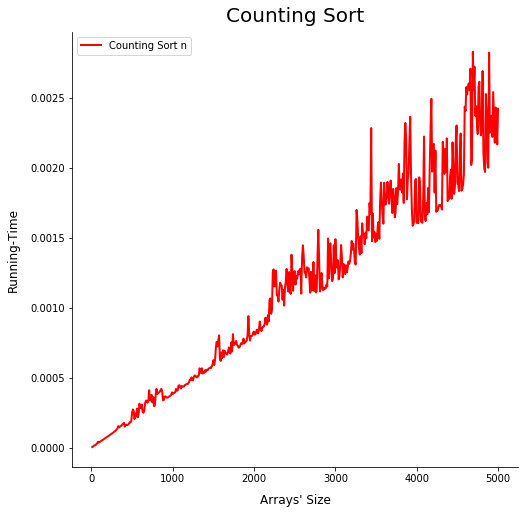

In [4]:
fig, ax = plt.subplots(figsize = (8,8))
ax.plot(data['Size'], data['Counting_mean'], lw = 2, label='Counting Sort n', color="red")
ax.spines['top'].set_alpha(0.0)
ax.spines['right'].set_alpha(0.0)
ax.set_title('Counting Sort', fontsize = 20, pad=10)
ax.set_xlabel("Arrays' Size", labelpad=10, fontsize=12)
ax.set_ylabel('Running-Time', labelpad=10, fontsize=12)
ax.legend()
plt.show();

10